# Task - 1

In [101]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10,5]

In [2]:
#load the dataset
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

#display fisrt 5 records
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
#rows and columns in data
df.shape

(12043, 23)

In [4]:
#datatypes of features
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [5]:
#info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
#checking the missing values in data
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
#checking the percentage of missing values in data
np.round((df.isnull().sum()/ len(df))*100,2)

status                0.00
card_present_flag    35.92
bpay_biller_code     92.65
account               0.00
currency              0.00
long_lat              0.00
txn_description       0.00
merchant_id          35.92
merchant_code        92.67
first_name            0.00
balance               0.00
date                  0.00
gender                0.00
age                   0.00
merchant_suburb      35.92
merchant_state       35.92
extraction            0.00
amount                0.00
transaction_id        0.00
country               0.00
customer_id           0.00
merchant_long_lat    35.92
movement              0.00
dtype: float64

In [8]:
#summary statistics for numeric features
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [9]:
#summary statistics for categorical features
df.describe(exclude =np.number)

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885.0,12043,12043,12043,12043,7717,12043,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3.0,100,1,100,6,5725,80,91,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,2018-09-28 00:00:00,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,c5d2754fd0f5420db2e8eaab9cd4ffcc,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883.0,578,12043,578,3934,14,746,174,6285,255,2169,10,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#unique values of all features
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

There are 100 unique customers(100 unique customer_id) in the transaction.

In [11]:
#check for duplicated records
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


No duplicate records are found.

We can see that there are columns which are not of any use such as country, merchant_code, currency,bpay_biller_code these all have only one value so we can drop them.

In [12]:
#rows and columns in data before dropping
df.shape

(12043, 23)

In [13]:
df.drop(['country', 'merchant_code', 'currency','bpay_biller_code'], axis = 1, inplace = True)
df.head(3)

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit


In [14]:
#rows and columns in data after dropping
df.shape

(12043, 19)

# EDA (Exploratory Data Analysis)

In [15]:
#feautres name in the data
df.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

In [16]:
#extracting some particular features for further analysis
df_new = df[['status', 'card_present_flag', 'account', 'txn_description','merchant_id', 'first_name', 'balance','date', 
             'gender', 'age','merchant_suburb', 'merchant_state', 'extraction', 'amount','customer_id', 'movement']]
df_new.head()

,status,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,movement
0,authorized,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit
3,authorized,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,debit


we are creating a new columns for monthwise and daywise

In [17]:
df_new['weekday'] = df_new['date'].dt.day_name()
df_new['month_name'] = df_new['date'].dt.month_name()

In [18]:
df_new.head()

,status,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,movement,weekday,month_name
0,authorized,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit,Wednesday,August
1,authorized,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit,Wednesday,August
2,authorized,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit,Wednesday,August
3,authorized,1.0,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,debit,Wednesday,August
4,authorized,1.0,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,debit,Wednesday,August


# Total number of transactions made on each day

In [19]:
df_new['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [20]:
df_new['weekday'].value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: weekday, dtype: int64

# Total number of transactions made by each customer

In [21]:
df_new['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

# Total number of transactions in each month

In [22]:
df_new['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

# Total number of transactions by gender wise

In [23]:
df_new['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

# Total number of transactions by age wise

In [24]:
df_new['age'].value_counts()

26    893
38    767
20    765
21    733
24    732
40    704
19    693
34    537
25    515
30    499
43    473
35    444
27    443
18    442
28    414
22    399
23    309
39    283
37    276
31    255
42    232
44    160
46    153
33    139
29    134
41    121
47    110
69    102
64     88
52     77
53     73
50     44
78     34
Name: age, dtype: int64

# Minimum, Maximum, Average transaction amount by each customer

In [25]:
 pd.pivot_table(df_new,index='customer_id',values='amount',aggfunc=['min','max','mean'])

,min,max,mean
,amount,amount,amount
customer_id,,,
CUS-1005756958,6.48,970.47,222.862603
CUS-1117979751,5.64,3578.65,339.843700
CUS-1140341822,4.09,1916.51,212.632500
CUS-1147642491,8.78,1711.39,245.600169
CUS-1196156254,3.66,3903.73,147.145796
...,...,...,...
CUS-72755508,5.19,1180.00,197.213276
CUS-809013380,4.30,1383.00,151.694274


# Minimum, Maximum, Average, Total transaction amount monthwise

In [26]:
 pd.pivot_table(df_new,index='month_name',values='amount',aggfunc=['min','max','mean','sum'])

,min,max,mean,sum
,amount,amount,amount,amount
month_name,,,,
August,1.52,8835.98,185.121867,729935.52
October,0.10,8835.98,196.427323,802798.47
September,0.10,8835.98,182.045903,730550.21


# Minimum, Maximum, Average, Total transaction amount day wise

In [27]:
 pd.pivot_table(df_new,index='weekday',values='amount',aggfunc=['min','max','mean','sum'])

,min,max,mean,sum
,amount,amount,amount,amount
weekday,,,,
Friday,2.08,8835.98,249.353517,516909.84
Monday,2.10,8835.98,373.221000,507580.56
Saturday,0.10,4233.00,54.419286,93002.56
Sunday,2.63,7081.09,53.015845,82174.56
Thursday,0.10,8835.98,184.010422,331402.77
Tuesday,1.52,6024.49,221.576456,329484.19
Wednesday,0.10,6107.23,195.215570,402729.72


# Top 10 customers

In [28]:
topcustomer= df['first_name'].value_counts(sort=True).head(10)
topcustomer

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

# Minimum, Maximum, Average, Total transaction amount month wise

In [29]:
pd.pivot_table(df_new,index='month_name',values='balance',aggfunc=['min','max','mean','sum'])

,min,max,mean,sum
,balance,balance,balance,balance
month_name,,,,
August,0.24,262153.86,10794.148620,42561328.01
October,559.10,267128.52,18450.991566,75409202.53
September,0.98,264519.11,14730.151136,59112096.51


# Minimum, Maximum, Average, Total transaction amount day wise

In [30]:
pd.pivot_table(df_new,index='weekday',values='balance',aggfunc=['min','max','mean','sum'])

,min,max,mean,sum
,balance,balance,balance,balance
weekday,,,,
Friday,0.98,267128.52,13669.240164,28336334.86
Monday,6.49,208926.10,15414.475029,20963686.04
Saturday,1.02,267093.66,15367.523019,26263096.84
Sunday,4.20,267028.97,13638.446710,21139592.40
Thursday,2.38,266704.88,16879.305541,30399629.28
Tuesday,0.24,265903.69,14766.759361,21958171.17
Wednesday,2.85,266916.32,13583.187814,28022116.46


In [31]:
df_new.head(3)

,status,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,movement,weekday,month_name
0,authorized,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit,Wednesday,August
1,authorized,0.0,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit,Wednesday,August
2,authorized,1.0,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit,Wednesday,August


Text(0.5, 1.0, 'Total number of Female vs Male')

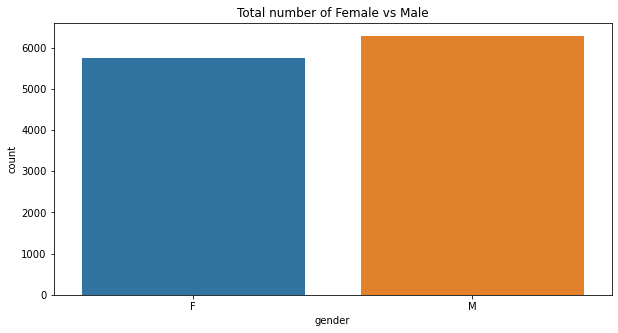

In [32]:
sns.countplot(data=df_new,x=df_new['gender'])
plt.title('Total number of Female vs Male')

Text(0.5, 1.0, 'Age wise Transactions')

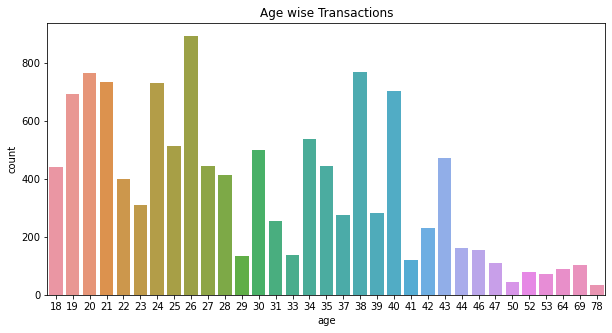

In [33]:
sns.countplot(data=df_new,x=df_new['age'])
plt.title('Age wise Transactions')

Text(0.5, 1.0, 'Total Weekly Transactions')

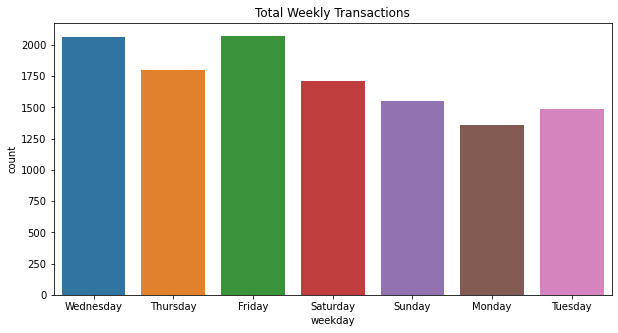

In [34]:
sns.countplot(data=df_new,x=df_new['weekday'])
plt.title('Total Weekly Transactions')

Text(0.5, 1.0, 'Total Monthly Transactions')

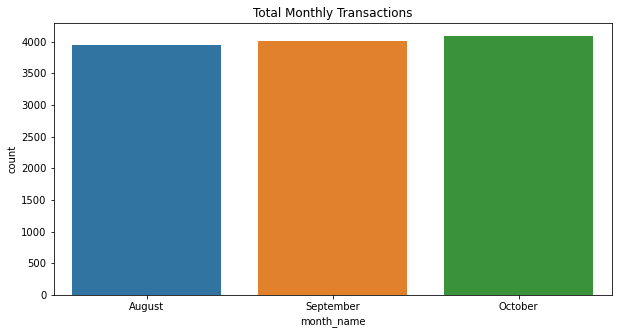

In [35]:
sns.countplot(data=df_new,x=df_new['month_name'])
plt.title('Total Monthly Transactions')

Text(0.5, 1.0, 'Card vs No Card Payment')

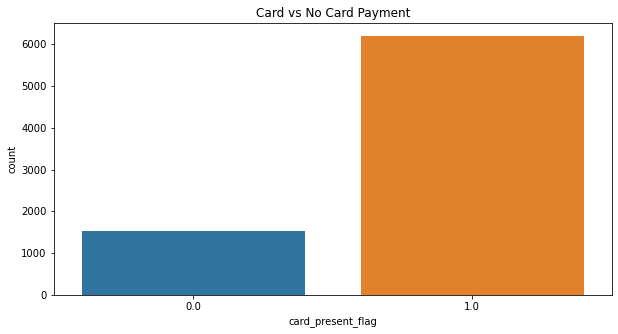

In [36]:
sns.countplot(df_new['card_present_flag'])
plt.title('Card vs No Card Payment')

In [37]:
df_new['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

Text(0.5, 1.0, 'Debit vs Credit')

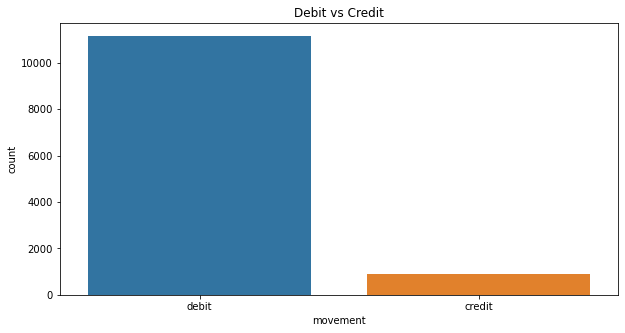

In [38]:
sns.countplot(df_new['movement'])
plt.title('Debit vs Credit')

In [39]:
df_new['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

Text(0.5, 1.0, 'Count vs Varioius state of merchant')

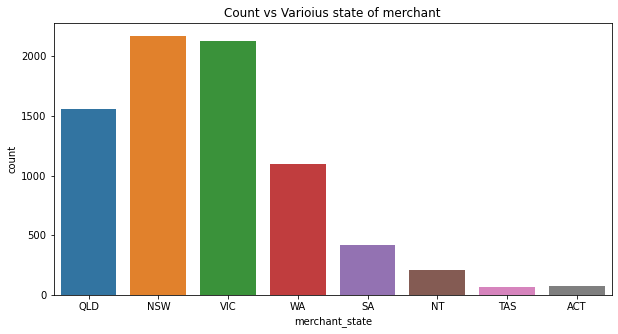

In [40]:
sns.countplot(df_new['merchant_state'])
plt.title('Count vs Varioius state of merchant')

In [41]:
df_new['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

[Text(0, 0.5, 'Name'),
 Text(0.5, 0, 'Number of transaction made'),
 Text(0.5, 1.0, 'Top 10 Customer')]

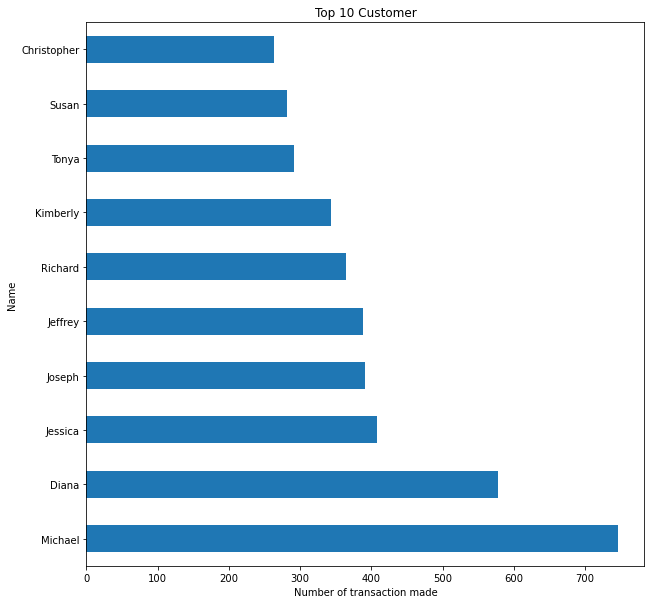

In [42]:
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
topcustomer.plot.barh()
ax.set(title="Top 10 Customer",
      xlabel="Number of transaction made",
      ylabel="Name")

Text(0.5, 1.0, 'Transaction Description')

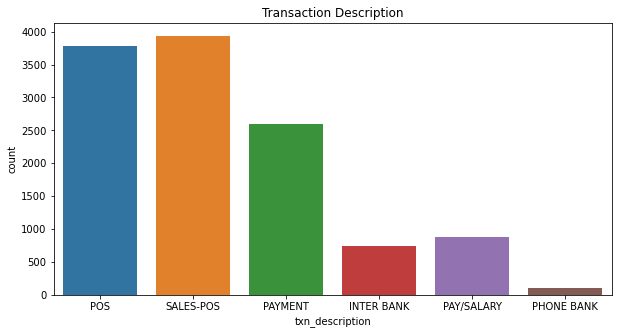

In [43]:
sns.countplot(df_new['txn_description'])
plt.title('Transaction Description')

Text(0.5, 1.0, 'Status')

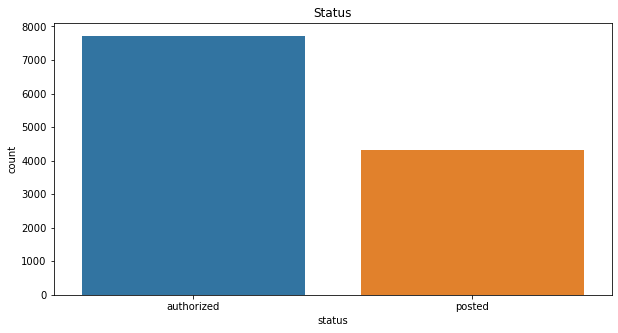

In [44]:
sns.countplot(df_new['status'])
plt.title('Status')

Text(0.5, 1.0, 'Gender vs card_present_flag')

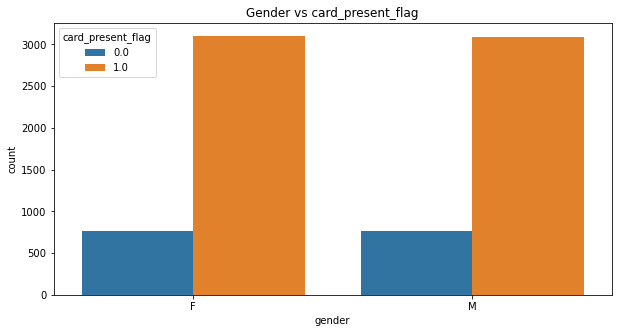

In [45]:
sns.countplot(df_new['gender'],hue=df_new['card_present_flag'])
plt.title('Gender vs card_present_flag')

Text(0.5, 1.0, 'Gender vs movement')

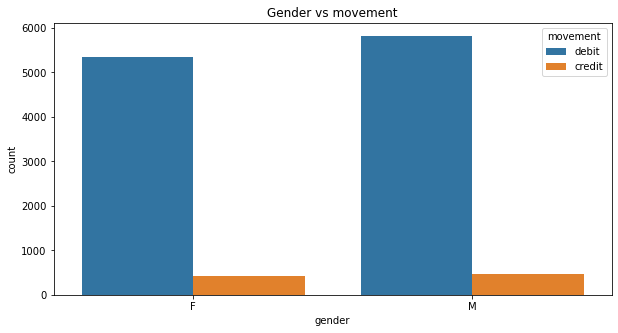

In [46]:
sns.countplot(df_new['gender'],hue=df_new['movement'])
plt.title('Gender vs movement')

Text(0.5, 1.0, 'Gender vs month wise')

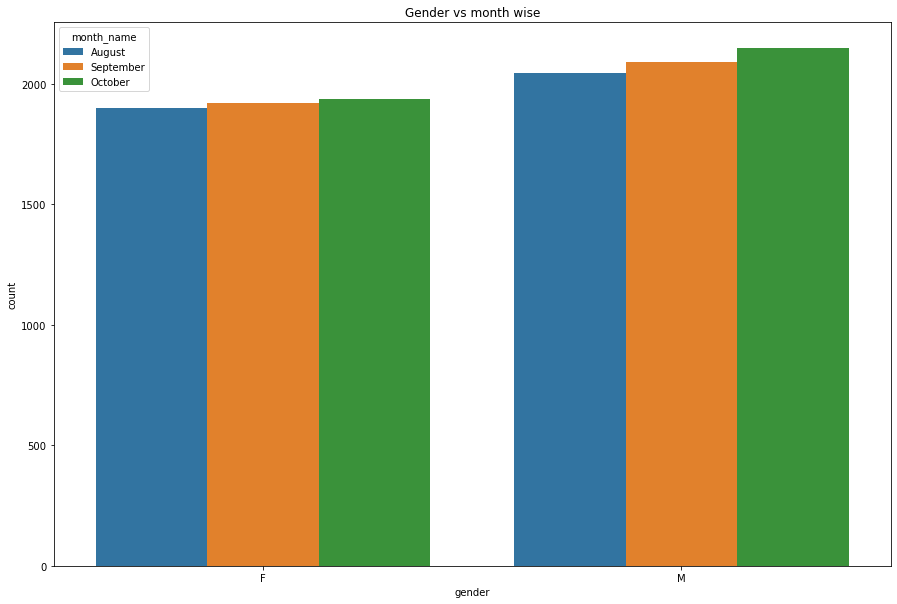

In [47]:
plt.figure(figsize=(15, 10))
sns.countplot(df_new['gender'],hue=df_new['month_name'])
plt.title('Gender vs month wise')

Text(0.5, 1.0, 'Gender vs weekday')

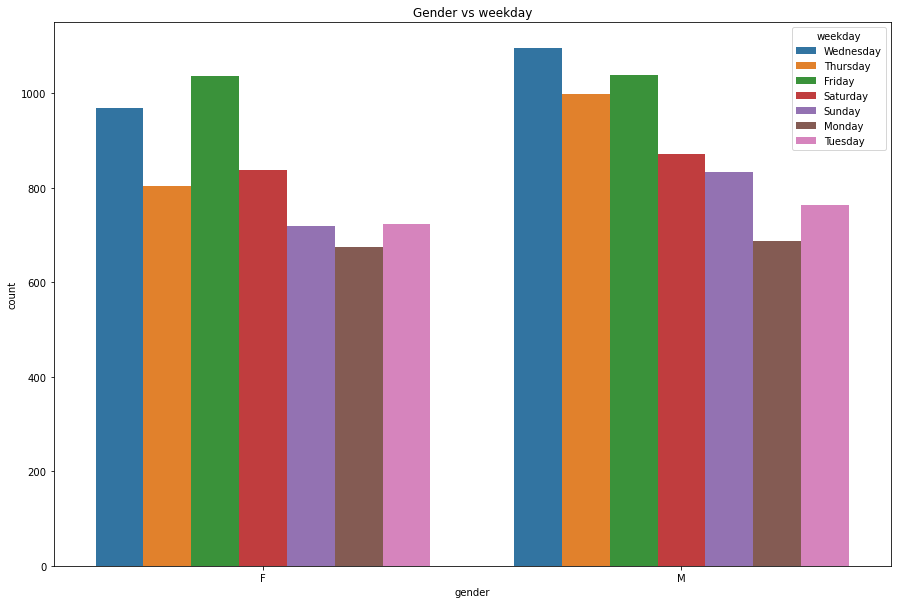

In [48]:
plt.figure(figsize=(15, 10))
sns.countplot(df_new['gender'],hue=df_new['weekday'])
plt.title('Gender vs weekday')

Text(0.5, 1.0, 'Age vs Month wise')

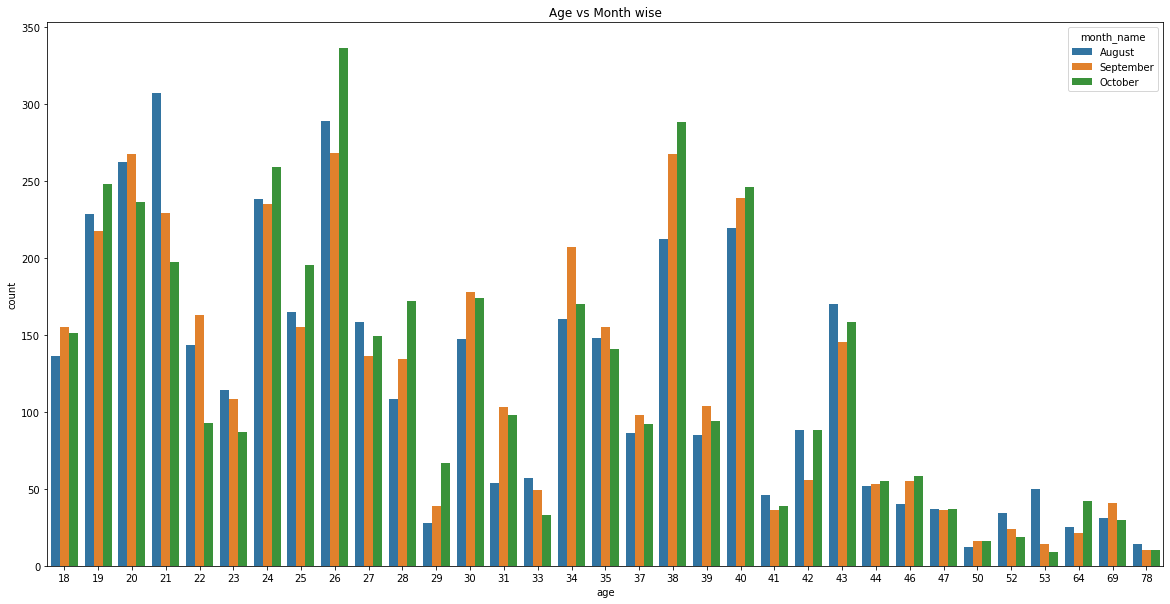

In [49]:
plt.figure(figsize=(20, 10))
sns.countplot(df_new['age'],hue=df_new['month_name'])
plt.title('Age vs Month wise')

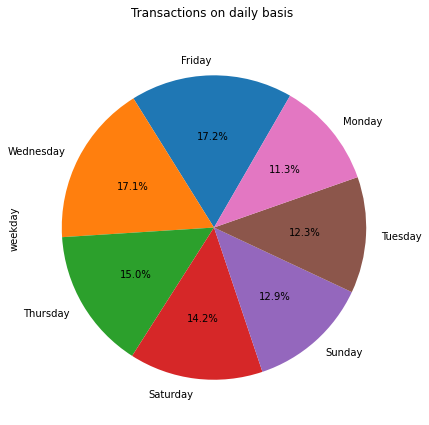

In [50]:
plt.figure(figsize=(7, 7))
df_new.weekday.value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title("Transactions on daily basis \n")
plt.show()

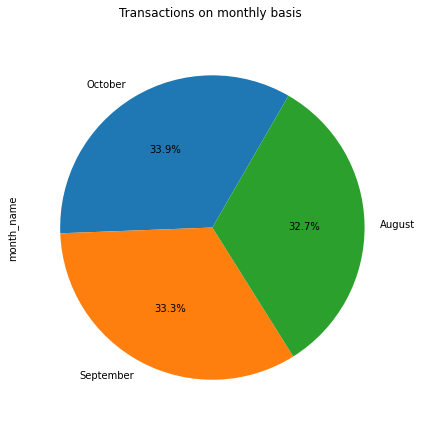

In [51]:
plt.figure(figsize=(7, 7))
df_new.month_name.value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title("Transactions on monthly basis \n")
plt.show()

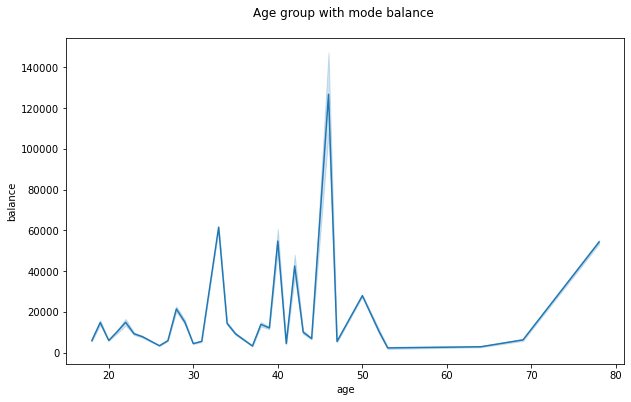

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'age', y = 'balance', data = df_new).set(title = "Age group with mode balance \n")
plt.show()

Text(0.5, 1.0, 'Correlation between features \n')

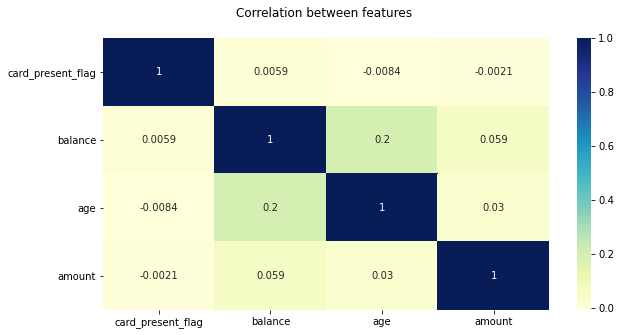

In [53]:
sns.heatmap(df_new.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation between features \n")

# Task - 2 : Predictive Analytics

For this task, you’ll likely need to use statistical software such as R, SAS, or Python.

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [55]:
#load the dataset
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

#display fisrt 5 records
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [56]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [65]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [82]:
df_salary = df[df["txn_description"]=="PAY/SALARY"].groupby('customer_id').mean().reset_index()
df_salary.head()

,customer_id,card_present_flag,merchant_code,balance,age,amount
0,CUS-1005756958,NaN,0.0,4718.665385,53,970.47
1,CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
2,CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
3,CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
4,CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [83]:
df_salary=df_salary.drop(['card_present_flag','merchant_code'],axis=1)
df_salary=df_salary.rename(columns = {'amount':'salary'})
df_salary.head(3)

,customer_id,balance,age,salary
0,CUS-1005756958,4718.665385,53,970.47
1,CUS-1117979751,11957.202857,21,3578.65
2,CUS-1140341822,5841.720000,28,1916.51


In [68]:
df_salary.columns

Index(['customer_id', 'card_present_flag', 'merchant_code', 'balance', 'age',
       'amount'],
      dtype='object')

In [69]:
#rows and columns
df_salary.shape

(100, 6)

# correlation between salary and all other features

In [85]:
df_salary.corr()

,balance,age,salary
balance,1.000000,0.227026,0.231019
age,0.227026,1.000000,-0.135264
salary,0.231019,-0.135264,1.000000


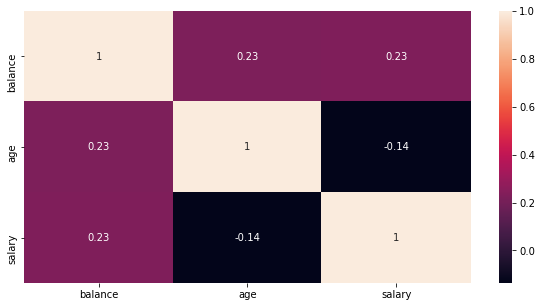

In [87]:
sns.heatmap(df_salary.corr(),annot=True)

# Visualise correlations using scatter plot

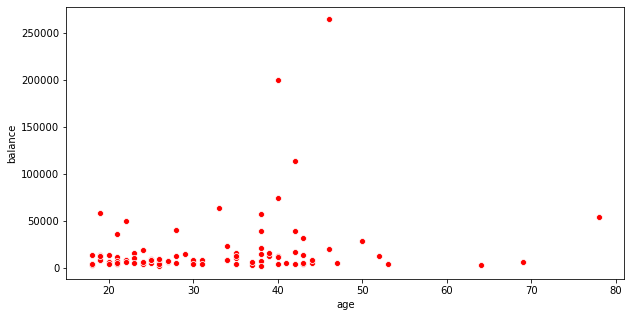

In [96]:
#scatter plot between age and balance
sns.scatterplot(x=df_salary.age, y=df_salary.balance,color='red')

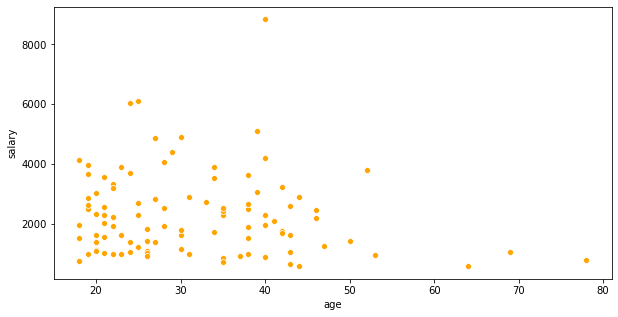

In [98]:
#scatter plot between age and salary
sns.scatterplot(x=df_salary.age, y=df_salary.salary,color='orange')

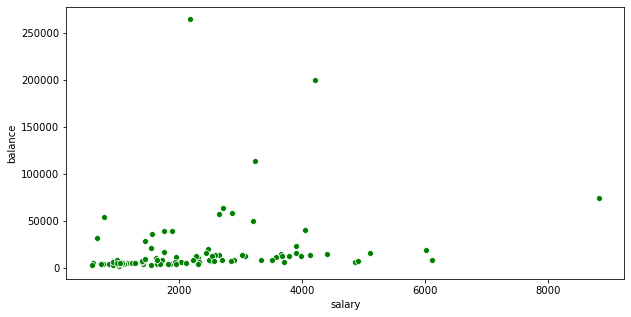

In [95]:
#scatter plot between salary and balance
sns.scatterplot(x=df_salary.salary, y=df_salary.balance,color= 'green')

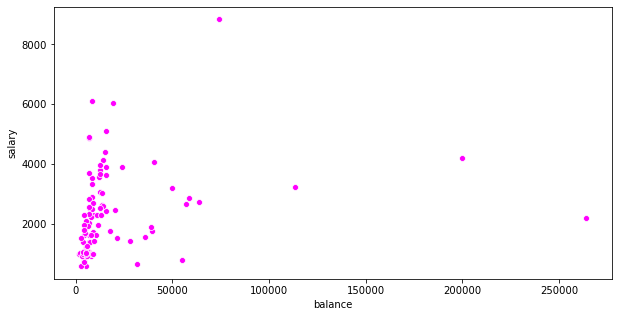

In [100]:
#scatter plot between balance and salary 
sns.scatterplot(x=df_salary.balance, y=df_salary.salary,color= 'magenta')

In [102]:
df_salary.dtypes

customer_id     object
balance        float64
age              int64
salary         float64
dtype: object

# Linear Regression:

# OLS Method:

In [106]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [122]:
X= df_salary.iloc[:,[1,2]]
X= sm.add_constant(X)

y =df_salary['salary']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
model =sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     7.136
Date:                Sat, 27 Mar 2021   Prob (F-statistic):            0.00155
Time:                        00:10:34   Log-Likelihood:                -595.96
No. Observations:                  70   AIC:                             1198.
Df Residuals:                      67   BIC:                             1205.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2306.8455    433.813      5.318      0.000    1440.952    3172.740
balance        0.0196      0.005      3.751      0.000       0.009       0.030
age          -13.0893     13.077     -1.001      0.320     -39.190      13.012
==============================================================================
Omnibus:                       40.959   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.665
Skew:                           1.852   Prob(JB):                     1.71e-26
Kurtosis:                       8.193   Cond. No.                     9.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
y_pred = model.predict(X_test)

In [124]:
print(f"Mean Absolute Error of our model is : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error of our model is : {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of our model is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean Absolute Error of our model is : 1278.0717146799213
Mean Squared Error of our model is : 2901188.713192114
Root Mean Squared Error of our model is : 1703.287619045038
Coefficient of determination: -0.2623085148345936


In [135]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.reset_index(drop=True).head(10)

,Actual,Predicted
0,3328.77,2184.096705
1,3649.51,2112.330460
2,2179.96,6871.376977
3,2443.24,2156.670207
4,916.75,1939.950987
5,1711.39,2034.211863
6,1272.47,1805.887630
7,2639.76,2320.076817
8,6107.23,2144.559050
9,2306.63,2121.060866


# Linear Regression:

In [128]:
X= df_salary.iloc[:,[1,2]]

y =df_salary['salary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [130]:
# Interpreting Model Coefficients
print('Intercept : ',linreg.intercept_)
print('Co efficient : ',linreg.coef_)

Intercept :  2306.8455294553933
Co efficient :  [  0.01956111 -13.08926077]


In [131]:
# Making predictions with our model
y_pred = linreg.predict(X_test)
y_pred[:5]

array([2184.09670538, 2112.33045991, 6871.37697663, 2156.670207  ,
       1939.95098664])

In [132]:
print(f"Mean Absolute Error of our model is : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error of our model is : {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of our model is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean Absolute Error of our model is : 1278.071714679921
Mean Squared Error of our model is : 2901188.713192111
Root Mean Squared Error of our model is : 1703.287619045037
Coefficient of determination: -0.26230851483459205


In [136]:
# Comparing Actual vs Predicted test results
results1 = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results1.reset_index(drop=True).head(10)

,Actual,Predicted
0,3328.77,2184.096705
1,3649.51,2112.330460
2,2179.96,6871.376977
3,2443.24,2156.670207
4,916.75,1939.950987
5,1711.39,2034.211863
6,1272.47,1805.887630
7,2639.76,2320.076817
8,6107.23,2144.559050
9,2306.63,2121.060866


# Decision Tree

In [142]:
from sklearn.metrics import accuracy_score

In [144]:
X= df_salary.iloc[:,[1,2]]

y =df_salary['salary']

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3)

model = DecisionTreeRegressor(random_state = 10)
decision_tree = model.fit(X_train, y_train)

In [147]:
# Making predictions with our model
y_pred = decision_tree.predict(X_test)
y_pred[:5]

array([2218.73, 1757.81, 3231.26, 3903.73,  862.95])

In [148]:
print(f"Mean Absolute Error of our model is : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error of our model is : {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of our model is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean Absolute Error of our model is : 1159.5859999999998
Mean Squared Error of our model is : 2198487.7300733337
Root Mean Squared Error of our model is : 1482.729823694571
Coefficient of determination: 0.04343699918179811


In [149]:
# Comparing Actual vs Predicted test results
results1 = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results1.reset_index(drop=True).head(10)

,Actual,Predicted
0,3328.77,2218.73
1,3649.51,1757.81
2,2179.96,3231.26
3,2443.24,3903.73
4,916.75,862.95
5,1711.39,3517.61
6,1272.47,2101.51
7,2639.76,3977.46
8,6107.23,2687.85
9,2306.63,1099.70
